In [11]:
import proj_helpers.FinObj as fin
import numpy as np
import proj_helpers.riskEngine as risk

In [12]:
#Map for units of time
t_map = {'2y':0.5,'year':1,'semester':2,'quarter':4,'month':12,'week':52,'2day':180,'day':360}

In [13]:
#MC Parameters
paths = 50000
t_del = 1

t_unit = 200 #Unit of time: default = 1 for years, 12 for months, 360 for days etc...
time_s = 200 #Total number of time steps in t_units

In [14]:
#Stock Parameters
spot = 100
vol = 0.20 #vol per year
rate = 0.05 #Rate in years
div = 0.0
expr = time_s/t_unit

#Share object
share1 = fin.Stock(spot,vol,t_unit,rate)

In [15]:
strike=100
payoff=fin.amCallVec #Define option payoff

#Option Parameters
myOption = fin.Option(share1,payoff,time_s,strike,t_unit)

callbs=risk.BSPut(spot, strike, div, rate, vol, expr) #Compute black scholes price


In [16]:
#Plot BS call vs. LSM call against spot
import matplotlib.pyplot as pplot
spots=np.linspace(80,120,20)
call_bs = {}
call_lsm = {}
for s in spots:
    call_bs[s] = risk.BSCall(s, strike, div, rate, vol, expr)
    share1.setSpot(s) #Change spot price for LSM
    call_lsm[s] = fin.priceLSM(share1,myOption,paths,time_s,t_unit,anti=True,num_basis=4)
    print("Spot : " + str(s) + " BS Price : " + str(call_bs[s]) + " LSM Price " + str(call_lsm[s]))

/Users/anthonymaylath/Documents/Schoolwork/NYU/High_Performance_Computing/Thesis/NYU_Machine_Learning_Project/pythonMC/proj_helpers/FinObj.py:310: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  betas = np.linalg.lstsq(X,Ct1)[0]


Spot : 80.0 BS Price : 1.8594195728121825 LSM Price 1.826756334056237
Spot : 82.10526315789474 BS Price : 2.368812862210522 LSM Price 2.3809937562098873
Spot : 84.21052631578948 BS Price : 2.9660674654600285 LSM Price 2.932305500849936
Spot : 86.3157894736842 BS Price : 3.655423498090421 LSM Price 3.617219138129872
Spot : 88.42105263157895 BS Price : 4.43974043382002 LSM Price 4.404892218777687
Spot : 90.52631578947368 BS Price : 5.320470535194538 LSM Price 5.305259240156305
Spot : 92.63157894736842 BS Price : 6.297694921737872 LSM Price 6.2504199821835895
Spot : 94.73684210526315 BS Price : 7.370212769650713 LSM Price 7.353428137177122
Spot : 96.84210526315789 BS Price : 8.535671979244107 LSM Price 8.52609880067057
Spot : 98.94736842105263 BS Price : 9.790728828494693 LSM Price 9.85855288465478
Spot : 101.05263157894737 BS Price : 11.1312244350488 LSM Price 10.98605625904411
Spot : 103.15789473684211 BS Price : 12.552366995612637 LSM Price 12.458111482797683
Spot : 105.26315789473685 

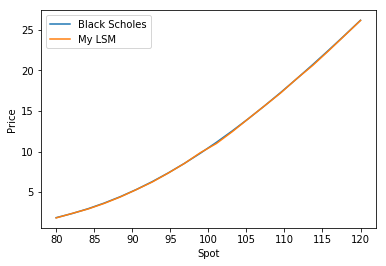

In [17]:
pplot.plot(spots,call_bs.values(),label='Black Scholes')
pplot.plot(spots,call_lsm.values(),label='My LSM')
pplot.legend()
pplot.xlabel('Spot')
pplot.ylabel('Price')
pplot.show()

In [18]:
# #Test against BS Call Price for paths
# import time
# call_p = {} #Call prices as a function of path size
# path_array = [10,100,250,500,1000,2000,5000,7500,10000,25000,50000,100000,500000,1000000]
# for paths in path_array:
#     t0=time.time()
#     test=fin.bridgePayoffs(share1,myOption,paths,time_s,t_unit,scheme=fin.mc_Mil,anti=True,num_basis=4)
#     call_p[paths]=np.mean(test)
#     print("Time : "+str(time.time()-t0)+", Paths : "+str(paths)\
#          +" LSM Price : "+str(call_p[paths])+" BS Price : "+str(callbs))

In [19]:
# #Test against BS Call Price for time steps
# paths = 75000
# call_pst = {} #Call prices as a function of path size
# step_array = [2,10,25,50,75,100,150,200]
# for t in step_array:
#     t0=time.time()
#     test=fin.bridgePayoffs(share1,myOption,paths,t,t_unit,scheme=fin.mc_Mil,anti=True,num_basis=4)
#     call_pst[t]=np.mean(test)
#     print("Time : "+str(time.time()-t0)+", Time Steps : "+str(t)\
#          +" LSM Price : "+str(call_pst[t])+" BS Price : "+str(callbs))